In [264]:
from collections import Counter
from math import modf

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

In [224]:
data = pd.read_csv("idz_data/flavors_of_cacao.csv")

In [225]:
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [229]:
data.dtypes

maker                 object
bar_name              object
ref                    int64
review_date            int64
cocoa_percent         object
location              object
rating               float64
bean_type             object
broad_bean_origin     object
percent              float64
dtype: object

In [227]:
new_columns = [
    "maker", 
    "bar_name", 
    "ref", 
    "review_date", 
    "cocoa_percent", 
    "location",
    "rating",
    "bean_type",
    "broad_bean_origin"
]

data.columns = new_columns
data.head()

,maker,bar_name,ref,review_date,cocoa_percent,location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [228]:
data["percent"] = data.cocoa_percent.apply(lambda x: float(x.split("%")[0])/100)

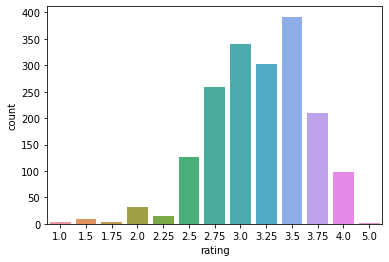

In [19]:
sns.countplot(data.rating)

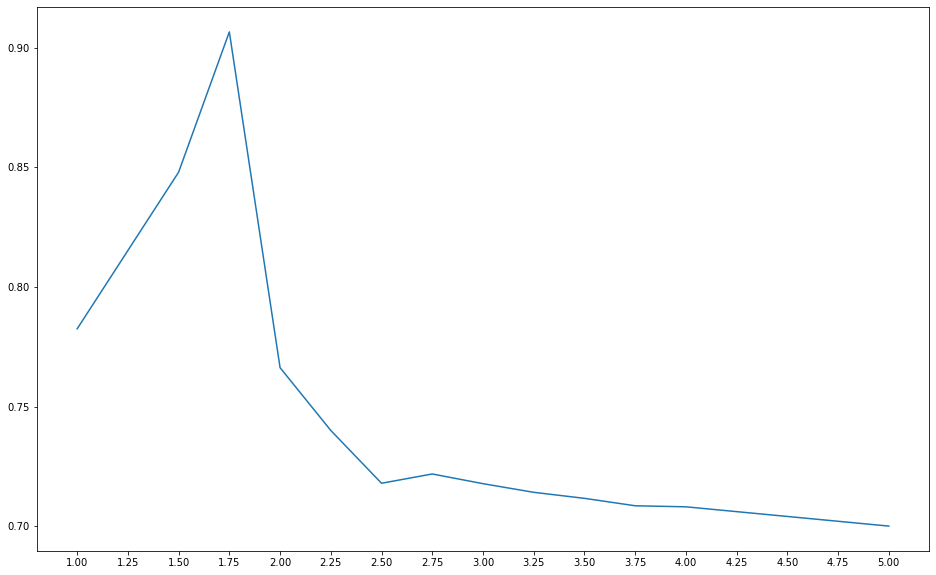

In [20]:
rating_cocoa_percent = data.groupby(['rating']).mean()

plt.figure(figsize=(16, 10))
plt.plot(rating_cocoa_percent['percent'])

plt.xticks(np.arange(1, 5.1, 0.25))

plt.show()

In [21]:
data.bean_type = data.bean_type.fillna('\xa0')
data.broad_bean_origin = data.broad_bean_origin.fillna('\xa0')

In [26]:
data.dtypes

maker                 object
bar_name              object
ref                    int64
review_date            int64
cocoa_percent         object
location              object
rating               float64
bean_type             object
broad_bean_origin     object
percent              float64
dtype: object

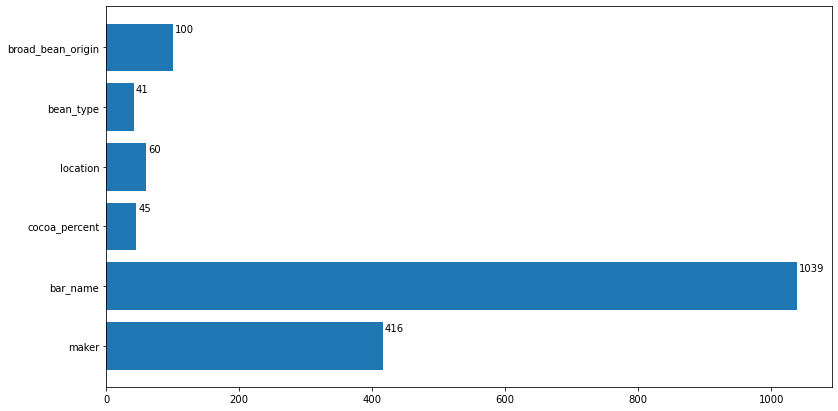

In [257]:
s = (data.dtypes == 'object')
objectives = list(s[s].index)

obj_cols_nunique = []
for col in objectives:
    obj_cols_nunique.append(data[col].nunique())

 
fig, ax = plt.subplots(figsize=(13, 7))

ax.barh(objectives, obj_cols_nunique)
# ax.figure()
for i, v in enumerate(obj_cols_nunique):
    ax.text(v+3, i+.25, str(v))
plt.show()

In [22]:
s = (data.dtypes == 'object')
object_columns = list(s[s].index)
object_columns.remove("bar_name")
object_columns.remove("cocoa_percent")
# object_columns.pop(object_columns.index("bean_type"))

In [23]:
# ONE HOT ENCODING and LABEL ENCODER


encoded_data = data.copy()

label_encoder = LabelEncoder()
OH_encoder = OneHotEncoder(sparse=False)

encoded_data["bar_name"] = label_encoder.fit_transform(encoded_data["bar_name"])


data_encoded_matrix = pd.DataFrame(
    OH_encoder.fit_transform(encoded_data[object_columns]),
)

In [24]:
data_numeric = encoded_data.drop(object_columns, axis=1)

encoded_data = pd.concat([data_numeric, data_encoded_matrix], axis=1)

encoded_data

,bar_name,ref,review_date,cocoa_percent,rating,percent,0,1,2,3,...,607,608,609,610,611,612,613,614,615,616
0,14,1876,2016,63%,3.75,0.63,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,492,1676,2015,70%,2.75,0.70,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67,1676,2015,70%,3.00,0.70,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1680,2015,70%,3.50,0.70,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,809,1704,2015,70%,3.50,0.70,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,754,647,2011,70%,3.75,0.70,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,258,749,2011,65%,3.00,0.65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1792,483,749,2011,65%,3.50,0.65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1793,483,781,2011,62%,3.25,0.62,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# drop REF column (and review_date)

encoded_data = encoded_data.drop(columns=["ref", "review_date", "cocoa_percent"])
encoded_data

,bar_name,rating,percent,0,1,2,3,4,5,6,...,607,608,609,610,611,612,613,614,615,616
0,14,3.75,0.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,492,2.75,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67,3.00,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,3.50,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,809,3.50,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,754,3.75,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,258,3.00,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1792,483,3.50,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1793,483,3.25,0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Learning

In [27]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [28]:
X, Y = encoded_data.drop(columns=["rating"]), encoded_data["rating"]

In [50]:
def round_rating_75(rating):
    if rating < 1.75:
        return 1
    elif rating < 2.75:
        return 2
    elif rating < 3.75:
        return 3
    elif rating < 4.75:
        return 4
    return 5


def round_rating(rating):
    if rating < 2:
        return 1
    if rating < 3:
        return 2
    if rating < 4:
        return 3
    if rating < 5:
        return 4
    return 5

Y_rounded = Y.apply(round_rating_75)

def round_rating_regression(rating):
    remainder, integer = modf(rating)
    
    if integer < 5:
        if remainder < 0.125:
            return int(integer)
        if remainder <= 0.25:
            value = f"{int(integer)}.25"
            return float(value)
        if remainder <= 0.5:
            value = f"{int(integer)}.5"
            return float(value)
        if remainder <= 0.75:
            value = f"{int(integer)}.75"
            return float(value)
    return 5
    

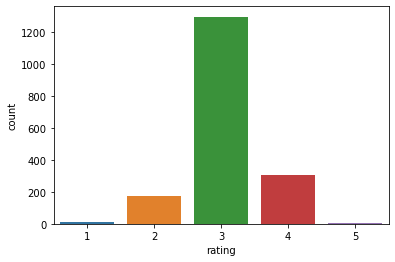

In [159]:
sns.countplot(Y_rounded)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    X, 
    Y_rounded, 
    test_size=0.3,
    random_state=1
)

In [87]:
forest_ = RandomForestClassifier()

parameters = {
    "n_estimators": [*range(2, 150, 12)],
    "max_depth": [*range(3, 12)],
    "min_samples_leaf": [1, 2, 3, 4, 5],
#     "n_jobs": [-1],
    
    
}


grid = GridSearchCV(
    forest_,
    parameters,
    cv=5
)

grid.fit(x_train, y_train)

C:\Users\kittr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [2, 14, 26, 38, 50, 62, 74, 86, 98,
                                          110, 122, 134, 146]})

In [88]:
estimator_75 = grid.best_estimator_
print(grid.best_params_)
estimator_75.score(x_test, y_test)  # 0.7217068645640075
# {'max_depth': 11, 'min_samples_leaf': 3, 'n_estimators': 2}

{'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 2}


0.7217068645640075

In [36]:
# estimator = grid.best_estimator_
# print(grid.best_params_)
# estimator.score(x_test, y_test)  # 0.7087198515769945
# {'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 2}

{'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 2}


0.7087198515769945

In [112]:
random_forest_classifier = RandomForestClassifier(
    n_estimators=2,
    min_samples_leaf=3,
    max_depth=11,
    n_jobs=-1,
    random_state=12
)

random_forest_classifier.fit(x_train, y_train)

random_forest_classifier.score(x_test, y_test)

0.7235621521335807

In [155]:
predictions = random_forest_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, 
    predictions, 
    average="weighted",
    zero_division=0
)

metrics_df = pd.DataFrame(
    {
        "accuracy": [accuracy],
        "precision": [precision],
        "recall": [recall],
        "f_measure": [f1]
    }
)

In [156]:
metrics_df

,accuracy,precision,recall,f_measure
0,0.723562,0.632898,0.723562,0.621553


Prediction classes: Counter({3: 529, 4: 8, 2: 2}) 
Original classes: Counter({3: 388, 4: 94, 2: 55, 1: 2})


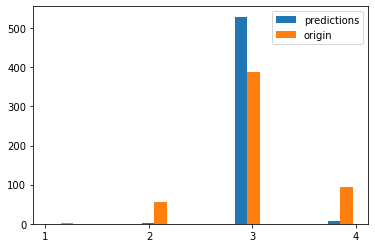

In [158]:
plt.hist([predictions, y_test], label=["predictions", "origin"])

plt.legend()
plt.xticks(np.arange(1, 5, 1))

print(f"Prediction classes: {Counter(predictions)} \nOriginal classes: {Counter(y_test)}")
plt.show()

In [191]:
conf_mtrx = confusion_matrix(y_test, predictions)
tp = np.diag(conf_mtrx)
fn = conf_mtrx.sum(axis=1) - np.diag(conf_mtrx)
fp = conf_mtrx.sum(axis=0) - np.diag(conf_mtrx)


In [192]:
tp

array([  0,   0, 385,   5], dtype=int64)

In [193]:
fp

array([  0,   2, 144,   3], dtype=int64)

In [194]:
fn

array([ 2, 55,  3, 89], dtype=int64)

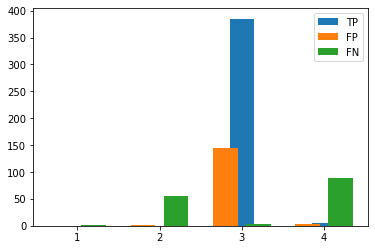

In [221]:
fig, ax = plt.subplots()

ax.bar(np.arange(1, 5), tp, width=0.3, label="TP")
ax.bar(np.arange(1, 5)-0.2, fp, width=0.3, label="FP")
ax.bar(np.arange(1, 5)+0.2, fn, width=0.3, label="FN")

plt.legend()
plt.xticks(np.arange(1, 5))

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.3,
    random_state=1
)

In [ ]:
forest_ = RandomForestRegressor()

parameters = {
    "n_estimators": [*range(2, 150, 12)],
    "max_depth": [*range(3, 12)],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "n_jobs": [-1],
    
    
}


grid = GridSearchCV(
    forest_,
    parameters,
    cv=5
)

grid.fit(x_train, y_train)

In [ ]:
random_forest_regressor = RandomForestRegressor(
    n_estimators=62,
    min_samples_leaf=2,
    max_depth=11,
    n_jobs=-1,
    random_state=12
)

random_forest_regressor.fit(x_train, y_train)

random_forest_regressor.score(x_test, y_test)

In [ ]:
predictions = random_forest_regressor.predict(x_test)

predictions = list(map(round_rating_regression, predictions))

metrics_df = pd.DataFrame(
    {
        "mae": [mean_absolute_error(y_test, predictions)],
        "mse": [mean_squared_error(y_test, predictions)],
        "max_error": [max_error(y_test, predictions)],
    }
)

metrics_df